# Imports

In [74]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing

In [46]:
# Get data
df = pd.read_csv("datapoints.csv")
df

,Unnamed: 0,fcs,fcs_staple_days,fcs_pulses_days,fcs_vegetables_days,fcs_fruit_days,fcs_meat_fish_days,fcs_dairy_days,fcs_sugar_days,fcs_oil_days,...,shock_violenceinsecconf,shock_theftofprodassets,shock_firemanmade,shock_othermanmadehazard,cs_sold_more_animals_yes,cs_borrowed_money_yes,cs_sold_prod_assets_yes,cs_begged_yes,adm1_pcode,inter_round
0,0,36.765938,4.479569,1.539232,2.363723,1.597153,0.283998,4.850574,2.893763,4.451262,...,-0.003799,-0.067442,0.294627,0.010888,0.081697,0.877422,0.141939,0.110493,AF01,7.0
1,1,48.019440,5.711806,1.768655,4.207732,1.217175,1.319809,3.660816,3.512739,4.186848,...,-0.041499,0.012806,0.031079,-0.051105,0.547356,0.827351,-0.040869,0.128251,AF02,7.0
2,2,42.851102,4.080927,0.573612,3.122404,0.918716,1.943910,3.162616,2.148337,4.660533,...,-0.029402,-0.179589,-0.026379,0.113689,0.252442,1.330842,-0.051543,-0.009972,AF03,7.0
3,3,20.432505,5.035512,1.873735,3.791061,-0.283542,3.613104,0.688531,1.107985,2.703673,...,-0.105062,0.037443,0.098864,0.020564,0.688767,0.916769,-0.338307,0.239243,AF04,7.0
4,4,35.561754,3.271171,3.229290,3.681760,0.417246,2.109009,2.897046,3.429491,5.471313,...,0.008324,-0.003670,0.082138,0.058789,0.130305,0.781506,-0.004417,-0.053022,AF05,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,232,17.151321,3.073373,4.339363,1.782201,2.566434,-2.289111,-2.282939,6.212624,2.499404,...,0.221330,-0.042156,-0.074999,-0.011976,-0.009847,0.041366,0.085991,-0.298692,YE28,11.0
233,233,36.168396,1.223866,1.238672,-40.764105,-8.836580,10.964719,-1.844789,0.270290,1.204760,...,-0.029539,-0.369355,0.353625,0.046557,-0.289432,0.575338,-2.576779,-0.164237,YE29,10.0
234,234,11.355743,4.160255,-1.201298,3.358429,-0.165101,4.670784,6.805350,-0.920761,2.897880,...,0.678798,0.000000,0.057146,-0.092295,0.118868,0.999966,0.021073,0.163536,YE29,11.0
235,235,-6.145043,3.536533,-3.691612,3.289756,-2.947653,1.934908,1.675263,3.265353,4.765566,...,0.041638,0.455342,0.561820,-0.132191,0.479667,1.321496,-0.271934,0.008482,YE30,11.0


In [48]:
# Cliping days between 0-7 and the other columns between 0-1
days_columns = ['fcs_staple_days', 'fcs_pulses_days', 'fcs_vegetables_days', 'fcs_fruit_days',
                      'fcs_meat_fish_days', 'fcs_dairy_days', 'fcs_sugar_days', 'fcs_oil_days', 'fcs_condiments_days']

yesno_columns = ['shock_noshock', 'shock_sicknessordeathofhh', 'shock_lostemplorwork',
                      'shock_otherintrahhshock', 'shock_higherfoodprices', 'shock_higherfuelprices',
                      'shock_mvtrestrict', 'shock_othereconomicshock', 'shock_pestoutbreak', 'shock_plantdisease',
                      'shock_animaldisease', 'shock_napasture', 'shock_othercropandlivests', 'shock_coldtemporhail',
                      'shock_flood', 'shock_hurricane', 'shock_drought', 'shock_earthquake', 'shock_landslides',
                      'shock_firenatural', 'shock_othernathazard', 'shock_violenceinsecconf',
                      'shock_theftofprodassets', 'shock_firemanmade', 'shock_othermanmadehazard',
                      'cs_sold_more_animals_yes', 'cs_borrowed_money_yes', 'cs_sold_prod_assets_yes', 'cs_begged_yes']

df[days_columns] = df[days_columns].clip(0, 7)
df[yesno_columns] = df[yesno_columns].clip(0, 1)
df

,Unnamed: 0,fcs,fcs_staple_days,fcs_pulses_days,fcs_vegetables_days,fcs_fruit_days,fcs_meat_fish_days,fcs_dairy_days,fcs_sugar_days,fcs_oil_days,...,shock_violenceinsecconf,shock_theftofprodassets,shock_firemanmade,shock_othermanmadehazard,cs_sold_more_animals_yes,cs_borrowed_money_yes,cs_sold_prod_assets_yes,cs_begged_yes,adm1_pcode,inter_round
0,0,36.765938,4.479569,1.539232,2.363723,1.597153,0.283998,4.850574,2.893763,4.451262,...,0.000000,0.000000,0.294627,0.010888,0.081697,0.877422,0.141939,0.110493,AF01,7.0
1,1,48.019440,5.711806,1.768655,4.207732,1.217175,1.319809,3.660816,3.512739,4.186848,...,0.000000,0.012806,0.031079,0.000000,0.547356,0.827351,0.000000,0.128251,AF02,7.0
2,2,42.851102,4.080927,0.573612,3.122404,0.918716,1.943910,3.162616,2.148337,4.660533,...,0.000000,0.000000,0.000000,0.113689,0.252442,1.000000,0.000000,0.000000,AF03,7.0
3,3,20.432505,5.035512,1.873735,3.791061,0.000000,3.613104,0.688531,1.107985,2.703673,...,0.000000,0.037443,0.098864,0.020564,0.688767,0.916769,0.000000,0.239243,AF04,7.0
4,4,35.561754,3.271171,3.229290,3.681760,0.417246,2.109009,2.897046,3.429491,5.471313,...,0.008324,0.000000,0.082138,0.058789,0.130305,0.781506,0.000000,0.000000,AF05,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,232,17.151321,3.073373,4.339363,1.782201,2.566434,0.000000,0.000000,6.212624,2.499404,...,0.221330,0.000000,0.000000,0.000000,0.000000,0.041366,0.085991,0.000000,YE28,11.0
233,233,36.168396,1.223866,1.238672,0.000000,0.000000,7.000000,0.000000,0.270290,1.204760,...,0.000000,0.000000,0.353625,0.046557,0.000000,0.575338,0.000000,0.000000,YE29,10.0
234,234,11.355743,4.160255,0.000000,3.358429,0.000000,4.670784,6.805350,0.000000,2.897880,...,0.678798,0.000000,0.057146,0.000000,0.118868,0.999966,0.021073,0.163536,YE29,11.0
235,235,-6.145043,3.536533,0.000000,3.289756,0.000000,1.934908,1.675263,3.265353,4.765566,...,0.041638,0.455342,0.561820,0.000000,0.479667,1.000000,0.000000,0.008482,YE30,11.0


In [49]:
# Getting X and Y
X_columns = ['fcs_staple_days', 'fcs_pulses_days',
       'fcs_vegetables_days', 'fcs_fruit_days', 'fcs_meat_fish_days',
       'fcs_dairy_days', 'fcs_sugar_days', 'fcs_oil_days',
       'fcs_condiments_days', 'shock_noshock', 'shock_sicknessordeathofhh',
       'shock_lostemplorwork', 'shock_otherintrahhshock',
       'shock_higherfoodprices', 'shock_higherfuelprices', 'shock_mvtrestrict',
       'shock_othereconomicshock', 'shock_pestoutbreak', 'shock_plantdisease',
       'shock_animaldisease', 'shock_napasture', 'shock_othercropandlivests',
       'shock_coldtemporhail', 'shock_flood', 'shock_hurricane',
       'shock_drought', 'shock_earthquake', 'shock_landslides',
       'shock_firenatural', 'shock_othernathazard', 'shock_violenceinsecconf',
       'shock_theftofprodassets', 'shock_firemanmade',
       'shock_othermanmadehazard']
y_columns = ['cs_sold_more_animals_yes',
       'cs_borrowed_money_yes', 'cs_sold_prod_assets_yes', 'cs_begged_yes']
X = df[X_columns]
Y = df[y_columns]

In [ ]:
# Train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [ ]:
# Preprocessing
sc = StandardScaler()
sc.fit(X_train)

X_train_transformed = sc.transform(X_train)
X_test_transformed = sc.transform(X_test)

# Train

In [ ]:
# Get model
model = xgb.XGBRegressor(tree_method="hist", device="cuda",objective="reg:squarederror")

In [52]:
# Train
model.fit(X_train_transformed,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
# Predict
Y_pred_train = model.predict(X_train_transformed)
Y_pred_test = model.predict(X_test_transformed)

In [54]:
# New train metrics
train_metric = np.sqrt(np.square((Y_pred_train - Y_train)).mean(axis=0))

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=train_metric.index, y=train_metric.values, palette="Blues_d")

# Customize the plot
ax.set(xlabel="Category", ylabel="Mean Root Squared Error (MRSE)", title="MRSE train")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

cs_sold_more_animals_yes    0.000583
cs_borrowed_money_yes       0.000554
cs_sold_prod_assets_yes     0.000460
cs_begged_yes               0.000520
dtype: float64

In [55]:
# Test metrics
test_metric = np.sqrt(np.square((Y_pred_test - Y_test)).mean(axis=0))

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=test_metric.index, y=test_metric.values, palette="Blues_d")

# Customize the plot
ax.set(xlabel="Category", ylabel="Mean Root Squared Error (MRSE)", title="MRSE test")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

cs_sold_more_animals_yes    0.273791
cs_borrowed_money_yes       0.415999
cs_sold_prod_assets_yes     0.165034
cs_begged_yes               0.212895
dtype: float64

# Hyperparameters tuning

In [67]:
# Cross validation greed search for best hyperparameters
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

model =  xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, objective="reg:squarederror",
                    silent=True, nthread=1, device="cuda",verbosity=0)

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_transformed, Y_train, verbose=0)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.02...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=600,
                                    n_jobs=None, nthread=1,
                                    num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [69]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 3,
 'min_child_weight': 5,
 'subsample': 0.8}

In [92]:
model = grid_search.best_estimator_

In [93]:
# New predict
Y_pred_train = model.predict(X_train_transformed)
Y_pred_test = model.predict(X_test_transformed)

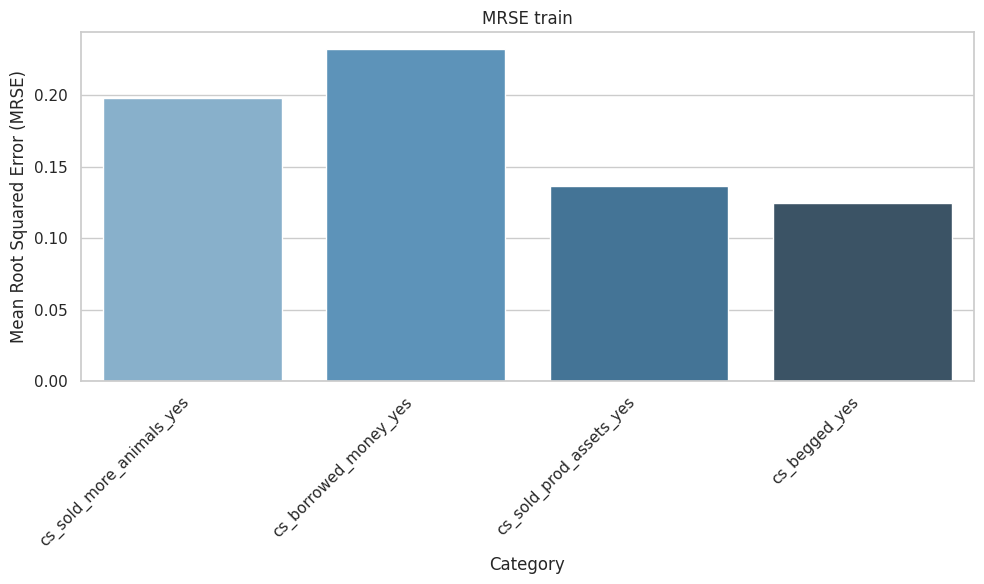

In [94]:
# New train metrics
train_metric = np.sqrt(np.square((Y_pred_train - Y_train)).mean(axis=0))

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=train_metric.index, y=train_metric.values, palette="Blues_d")

# Customize the plot
ax.set(xlabel="Category", ylabel="Mean Root Squared Error (MRSE)", title="MRSE train")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

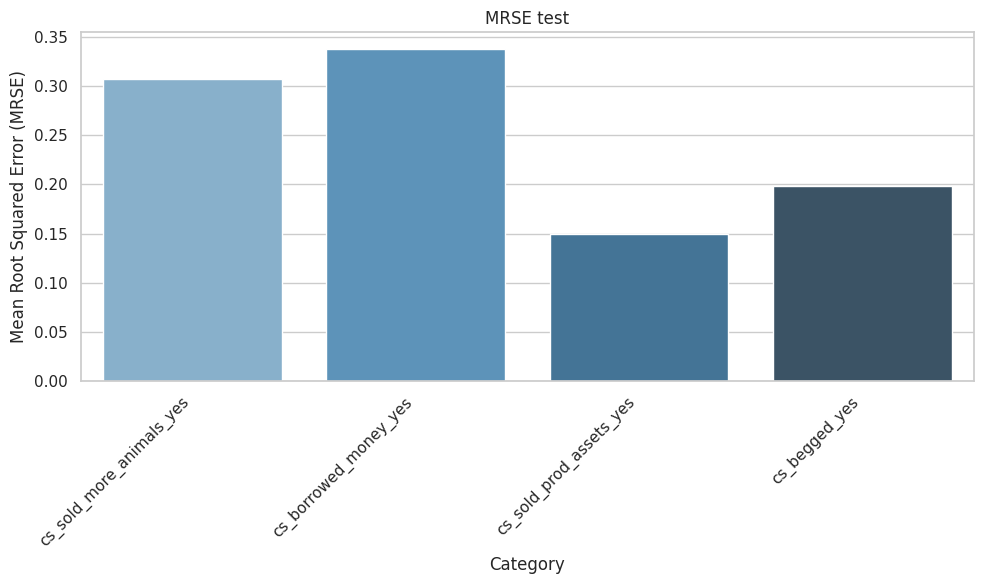

In [95]:
# New test metrics
test_metric = np.sqrt(np.square((Y_pred_test - Y_test)).mean(axis=0))

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=test_metric.index, y=test_metric.values, palette="Blues_d")

# Customize the plot
ax.set(xlabel="Category", ylabel="Mean Root Squared Error (MRSE)", title="MRSE test")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

# Save and load

In [96]:
# Save model
model.save_model("god_model.model")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:08:25] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [88]:
# Load model
model_2 = xgb.XGBRegressor(tree_method="hist", device="cuda")
model_2.load_model("god_model.model")

In [97]:
# Predict
Y_pred_train = model_2.predict(X_train_transformed)
Y_pred_test = model_2.predict(X_test_transformed)

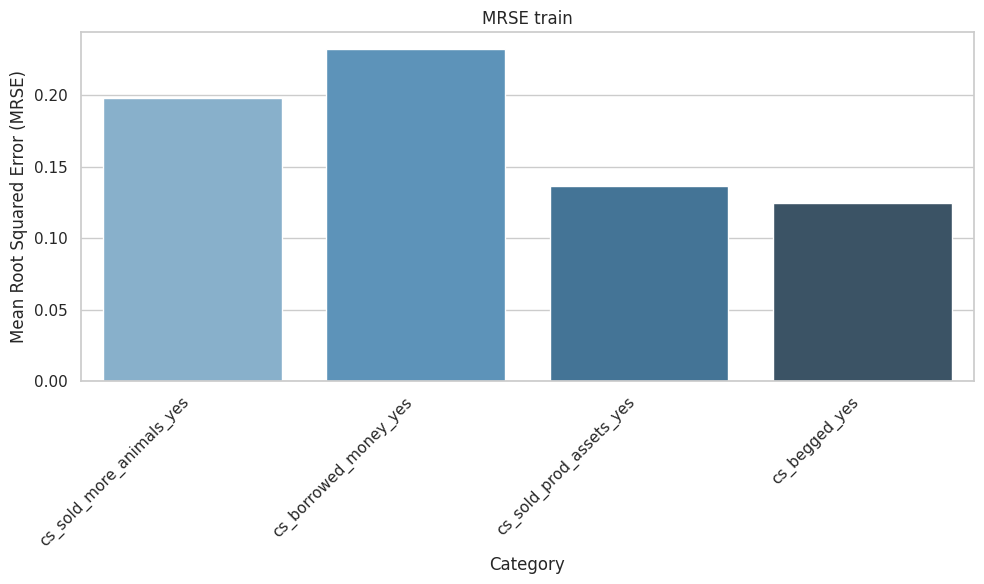

In [98]:
# Evaluate metrics again (just for checking)
# Train metrics
train_metric = np.sqrt(np.square((Y_pred_train - Y_train)).mean(axis=0))

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=train_metric.index, y=train_metric.values, palette="Blues_d")

# Customize the plot
ax.set(xlabel="Category", ylabel="Mean Root Squared Error (MRSE)", title="MRSE train")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

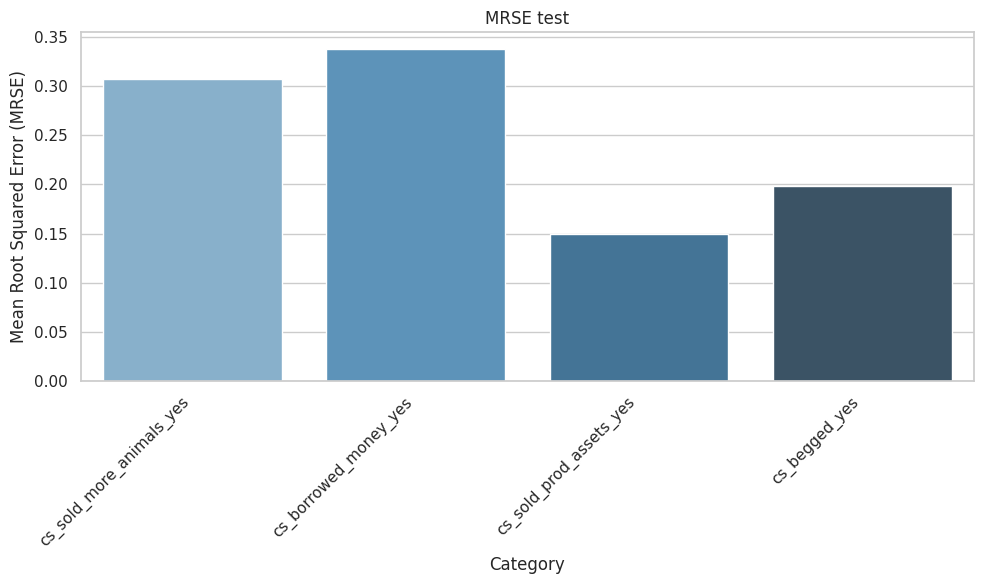

In [99]:
# Test metrics
test_metric = np.sqrt(np.square((Y_pred_test - Y_test)).mean(axis=0))

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=test_metric.index, y=test_metric.values, palette="Blues_d")

# Customize the plot
ax.set(xlabel="Category", ylabel="Mean Root Squared Error (MRSE)", title="MRSE test")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()